# Tutorial 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cars = pd.read_csv(cardata.csv)

In [41]:
polygons = {
    'Name': [
        'Triangle', 'Quadrilateral', 'Pentagon', 'Hexagon', 'Heptagon', 
        'Octagon', 'Nonagon', 'Decagon', 'Hendecagon', 'Dodecagon', 
        'Tridecagon', 'Tetradecagon'],
     # Range parameters are the start, the end of the range and the step
     'Sides': range(3, 15, 1),
}

polygons_df = pd.DataFrame(polygons) # Create pandas data frames by using dictionary containing lists

print(polygons_df)

             Name  Sides
0        Triangle      3
1   Quadrilateral      4
2        Pentagon      5
3         Hexagon      6
4        Heptagon      7
5         Octagon      8
6         Nonagon      9
7         Decagon     10
8      Hendecagon     11
9       Dodecagon     12
10     Tridecagon     13
11   Tetradecagon     14


In [43]:
polygons_df.head(5)

,Name,Sides
0,Triangle,3
1,Quadrilateral,4
2,Pentagon,5
3,Hexagon,6
4,Heptagon,7


In [33]:
polygons_df[
   'Length of Name' # Create a new column
] = polygons_df['Name'].str.len()
# polygons_df['Name'] extracts the value of the column "Name"
# polygons_df['Name'].str change the values above into string
# polygons_df['Name'].str.len() give the result of length of the "Name"

In [27]:
polygons_df.head(5)

,Name,Sides,Length of Name
0,Triangle,3,8
1,Quadrilateral,4,13
2,Pentagon,5,8
3,Hexagon,6,7
4,Heptagon,7,8


In [47]:
polygons_df[
   'Length of Name' # Similar to the above code chunk
] = polygons_df['Name'].apply(len)

polygons_df.head(5)

,Name,Sides,Length of Name
0,Triangle,3,8
1,Quadrilateral,4,13
2,Pentagon,5,8
3,Hexagon,6,7
4,Heptagon,7,8


In [49]:
## Question 3
values = []

for x in range(5):
    value = float(input("Enter 5 values"))
    values.append(value)

max(values)

Enter 5 values 4
Enter 5 values 5
Enter 5 values 6
Enter 5 values 1
Enter 5 values 90


90.0

In [61]:
## Question 4
matrixA = np.random.randint(0,11, size = [2,3])
print(matrixA)   ### 1

print(matrixA.T)   ### 3

matrixB = np.random.randint(0,4, size = [3,4])
print(matrixB)   ### 2

print(matrixA @ matrixB)   ### 4 (2x3 . 3x4 = 2x4)

[[6 7 8]
 [9 5 2]]
[[6 9]
 [7 5]
 [8 2]]
[[3 3 0 2]
 [2 0 1 2]
 [1 3 1 0]]
[[40 42 15 26]
 [39 33  7 28]]


# Tutorial 2

## Question 1

In [82]:
df_taxi = pd.DataFrame(
    {
        'Kilometres': [1, 2, 3, 4, 5],
        'Meter': [7.5, 10, 12.5, 15, 17.5],
        'Paid (incl. tips)': [8, 10, 14, 15, 20],
    }
)

In [84]:
df_taxi.head(5)

,Kilometres,Meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [86]:
df_taxi.set_index('Kilometres')[['Meter']]
# Kinda set the column "Kilometres" as a base (name for each row)

,Meter
Kilometres,
1,7.5
2,10.0
3,12.5
4,15.0
5,17.5


In [88]:
df_taxi.set_index('Kilometres')[['Meter', 'Paid (incl. tips)']] # Same as above

,Meter,Paid (incl. tips)
Kilometres,,
1,7.5,8
2,10.0,10
3,12.5,14
4,15.0,15
5,17.5,20


In [359]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
######################################################################
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
######################################################################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
######################################################################
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg_l1 = SGDRegressor(penalty="l1")
sgd_reg_l2 = SGDRegressor(penalty="l2")
######################################################################
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
######################################################################
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)

In [100]:
lin_reg.fit(df_taxi[['Kilometres']], df_taxi['Paid (incl. tips)'])
print('Amount Paid = {:.1f} + {:.1f} * Distance'.format(lin_reg.intercept_, lin_reg.coef_[0]))
print(lin_reg.predict(df_taxi[['Kilometres']]))

Amount Paid = 4.7 + 2.9 * Distance
[ 7.6 10.5 13.4 16.3 19.2]


In [92]:
df_taxi['Paid (Predicted)'] = lin_reg.predict(df_taxi[['Kilometres']])
df_taxi.head(5)

,Kilometres,Meter,Paid (incl. tips),Paid (Predicted)
0,1,7.5,8,7.6
1,2,10.0,10,10.5
2,3,12.5,14,13.4
3,4,15.0,15,16.3
4,5,17.5,20,19.2


## Question 2

In [107]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [128]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta_best:", theta_best[0,0], 'and', theta_best[1,0])
print(theta_best)    # Matrix 2x1

theta_best: 3.941791561721633 and 2.974870728274447
[[3.94179156]
 [2.97487073]]


In [131]:
X_new = np.array([[0], [2]])    # Matrix 2x1
X_new_b = np.c_[np.ones((2, 1)), X_new]    # Matrix 2x2
X_new_b.dot(theta_best)   # Predict = matrix 2x2 . 2x1  = 2x1

array([[3.94179156],
       [9.89153302]])

In [141]:
lin_reg.fit(X, y)

LinearRegression()

In [143]:
print("LinearReg predict: ", lin_reg.predict(X_new))

LinearReg predict:  [[3.94179156]
 [9.89153302]]


In [173]:
X = 2 * np.random.rand(300, 1)
y = 4 + 3 * X + np.random.randn(300, 1)
X_b = np.c_[np.ones((300, 1)), X]

In [195]:
######################## Batch linear regression
n_iterations = 1000
m = len(X)

eta = 0.1 ######################### learning rate 1
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print("batch", theta)

eta = 0.02 ######################### learning rate 2
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print("batch", theta)

eta = 0.1 ######################### learning rate 3
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print("batch", theta)

######################## They all converge at the kinda similar point

batch [[4.17471264]
 [2.8644093 ]]
batch [[4.17176807]
 [2.86693784]]
batch [[4.17471264]
 [2.8644093 ]]


In [205]:
################ Stochastic linear gression 
def learning_schedule(t):
    return t0 / (t + t1)

n_epochs = 50
t0 = 5 # learning schedule hyperparameters

t1 = 50
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print("stochastic", theta)

t1 = 80
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print("stochastic", theta)

t1 = 100
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print("stochastic", theta)

######################## They all converge at the kinda similar point

stochastic [[4.17641903]
 [2.82742662]]
stochastic [[4.17596253]
 [2.83420258]]
stochastic [[4.18281573]
 [2.88884514]]


In [231]:
################################## sklearn SGDRegressor
eta_list = [0.1, 0.5, 1]
for eta in eta_list:
    sgd_reg = SGDRegressor(max_iter=50, penalty = None, eta0 = eta)
    sgd_reg.fit(X, y.ravel())
    sgd_reg.intercept_, sgd_reg.coef_
    print("stochastic", sgd_reg.intercept_, sgd_reg.coef_)

######################## They all converge at the kinda similar point

stochastic [4.22187181] [2.94070594]
stochastic [4.28258626] [3.22055997]
stochastic [4.41843331] [3.23818817]


# Tutorial 3

In [236]:
from sklearn import datasets
iris = datasets.load_iris()  
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [240]:
print(iris['target'])
print(iris['target_names'])
print(iris['feature_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [248]:
iris['data'][:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# setosa and petal width

In [256]:
X = iris['data'][:,3:] # petal_width (cm)
y = (iris['target'] == 0) # setosa

In [266]:
log_reg.fit(X,y)

LogisticRegression()

In [268]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # 1000 obs with petal_width from 0 to 3
y_proba = log_reg.predict_proba(X_new)
print(log_reg.classes_)

[False  True]


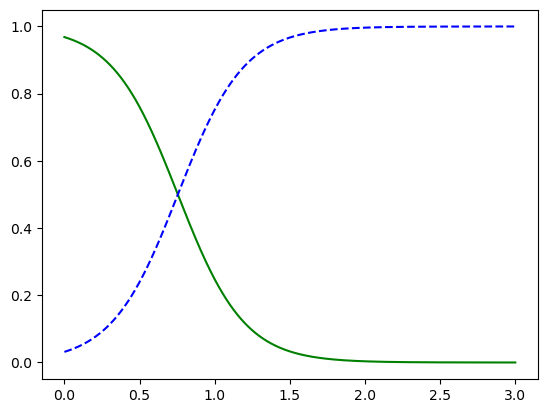

In [270]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Setosa")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Setosa")

In [284]:
X_new = [[0.3], [0.75], [1.5]]
print(log_reg.predict(X_new))
print(log_reg.predict_proba(X_new))

[ True  True False]
[[0.11276102 0.88723898]
 [0.49445696 0.50554304]
 [0.96703998 0.03296002]]


In [292]:
student1 = pd.read_csv('students1.csv', header = None)
student2 = pd.read_csv('students2.csv', header = None)

In [300]:
student1.head(5)
# student1[0]: column of study time
# student1[1]: column of pass/fail

,0,1
0,3.471435,0
1,1.809024,0
2,4.432707,0
3,2.687348,0
4,2.279411,0


In [308]:
log_reg.fit(student1[0].to_numpy().reshape(-1,1), student1[1].to_numpy().reshape(-1,1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [314]:
student1_predict = log_reg.predict(student1[0].to_numpy().reshape(-1,1))
student1_real = student1[1].to_numpy().reshape(-1,1)

In [322]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [324]:
print(confusion_matrix(student1_real, student1_predict))
print("Precision rate", precision_score(student1_real, student1_predict))
print("Recall rate", recall_score(student1_real, student1_predict))

[[49  1]
 [ 1 49]]
Precision rate 0.98
Recall rate 0.98


In [326]:
student2_predict = log_reg.predict(student2[0].to_numpy().reshape(-1,1))
student2_real = student2[1].to_numpy().reshape(-1,1)

In [328]:
print(confusion_matrix(student2_real, student2_predict))
print("Precision rate", precision_score(student2_real, student2_predict))
print("Recall rate", recall_score(student2_real, student2_predict))

[[49  1]
 [ 0 50]]
Precision rate 0.9803921568627451
Recall rate 1.0


# Tutorial 4

In [353]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #WITH NOISE

In [375]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [379]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
       print("Scores:", scores)
       print("Mean:", scores.mean())
       print("Standard deviation:", scores.std())

In [365]:
def plot_learning_curves(model, X, y): # model (name of regression)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)+1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)

In [369]:
reg_list = [lin_reg, poly_reg, sgd_reg, sgd_reg_l1, sgd_reg_l2, ridge_reg, lasso_reg]

In [383]:
for reg in reg_list:
    print(reg)
    print(display_scores(cross_val_score(reg, X, y)), '\n')

LinearRegression()
Scores: [0.63594889 0.65636395 0.56954614 0.48583359 0.46922163]
Mean: 0.5633828403516414
Standard deviation: 0.07593355438169885
None 

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('lin_reg', LinearRegression())])
Scores: [0.85642444 0.70848492 0.74714281 0.83070884 0.74971697]
Mean: 0.7784955967800121
Standard deviation: 0.05569888688217965
None 

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)
Scores: [0.63729643 0.64676563 0.53190234 0.49714518 0.46617168]
Mean: 0.5558562513532432
Standard deviation: 0.07343176595394081
None 

SGDRegressor(penalty='l1')
Scores: [0.63664745 0.65805542 0.56645143 0.48726291 0.46805355]
Mean: 0.563294150765836
Standard deviation: 0.07644853719006607
None 

SGDRegressor()
Scores: [0.6369641  0.65765339 0.5686956  0.48614811 0.46835015]
Mean: 0.5635622690637602
Standard deviation: 0.07658409655979313
None 

Ridge(alpha=1, solver='cholesky')
Scores: [0.6361243

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp